In [32]:
#ramin rowshan 9732491


# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn




### Import pandas, numpy, matplotlib and sklearn

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


### Importing dataset to your code
1. read .csv file by pandas library
2. use **describe()** and **head()** functions look over dataset
3. plot **mean** and **variance** of data

In [34]:
df = pd.read_csv("bmi.csv")

In [35]:
df.head()

,Unnamed: 0,0
0,0,0.061696
1,1,-0.051474
2,2,0.044451
3,3,-0.011595
4,4,-0.036385


In [36]:
df.describe()

,Unnamed: 0,0
count,442.000000,4.420000e+02
mean,220.500000,-8.042209e-16
std,127.738666,4.761905e-02
min,0.000000,-9.027530e-02
25%,110.250000,-3.422907e-02
50%,220.500000,-7.283766e-03
75%,330.750000,3.124802e-02
max,441.000000,1.705552e-01


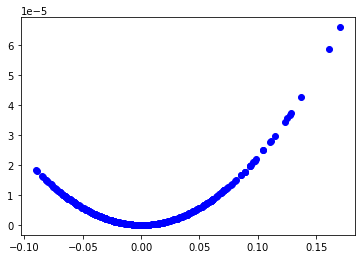

In [37]:
df_np = np.array(df)
df_mean = np.mean(df_np,axis=0)
df_var = np.var(df_np,axis=0)
feature_var = [ ((i - df_mean[1])**2 )/len(df_np) for i in df_np[:,1] ]
plt.plot(df_np[:,1],feature_var,color="blue",linestyle=' ',marker='o')



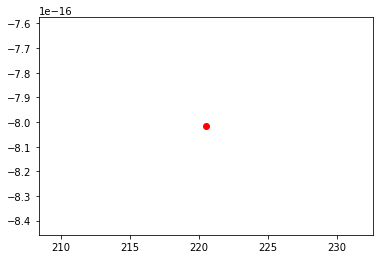

In [38]:
plt.plot(df_mean[0],df_mean[1],color="red",linestyle=' ',marker='o')


### Split data
1. using sklearn.model_selection to split your dataset (80% for training)
  * you can use numpy for spliting too

In [39]:
train, test = train_test_split(df,train_size=0.8)


### Linear Regression class
1. complete **fit** method
2. complete **predict** method
3. complete **mean squared error (MSE)** method

In [40]:
#Task3
class Linear_Regression:
    def __init__(self):
        self.x = None
        self.y = None
        self.alpha0 = None
        self.alpha1 = None
        self.coeffients = []
        
    def fit(self,x,y):
        self.x = np.array(x)
        self.y = np.array(y)
        
        self.alpha1 = 0
        self.alpha0 = 0
        
     
        x_mean = np.mean(self.x,axis=0)
        y_mean = np.mean(self.y,axis=0)
        
        
        numerator = 0
        Denominator = 0
        for i in range(len(x)):
            
            numerator += (self.x[i] - x_mean) * (self.y[i]- y_mean)
            Denominator += (self.x[i] - x_mean) ** 2
        

        self.alpha1 = numerator/Denominator
        self.alpha0 =  y_mean-self.alpha1*x_mean
            
        
        self.coeffients = [self.alpha0, self.alpha1]
        return self
    
    def predict(self,x):
        np_x = np.array(x)
        return (np_x * self.alpha1 + self.alpha0)
    
    def mse(self,x,y):
        np_x = np.array(x)
        np_y = np.array(y)

        error = (np_y - (np_x * self.alpha1 + self.alpha0))
        return ( 1/ len(x) ) * np.sum(np.power(error,2))

### Use dataset to create sample Linear regression
1. create new instance of Linear_Regression class
2. import x_train and y_train parts to fit method
3. predict new y by using x_test and predict method
4. now find how much is your MSE

In [41]:
x_train,y_train = train.iloc[:,0],train.iloc[:,1]
LR = Linear_Regression()
LR.fit(x_train,y_train)
x_test,y_test = test.iloc[:,0],test.iloc[:,1]
predict = LR.predict(x_test)
LR.mse(x_test,y_test)


0.002257098173291317

### Plot data and the line
1. use scatter plot to plot dataset
2. plot regression line with another color

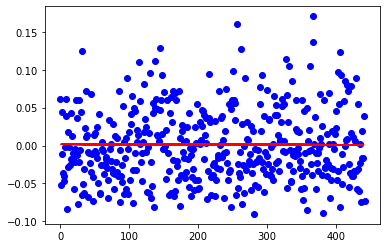

In [42]:
plt.plot(df.iloc[:,0],df.iloc[:,1],color="blue",linestyle=' ' , marker='o')
plt.plot(x_test,predict,color="red",linestyle='solid')